In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
from keras.utils.data_utils import Sequence
import sys
from PIL import *
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2   
import os
import random
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img_width, img_height = 224, 224
IMG_SIZE = 224

In [ ]:
'''
CATEGORIES =['no_pneumonia','pneumonia']
train_data = r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\train'
test_data = r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\test'
val_data = r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\val'

def pre_pro(DIRECTORY):

  data = []
  #pre-processing
  for category in CATEGORIES:
        folder = os.path.join(DIRECTORY, category)
        label = CATEGORIES.index(category)
        for img in tqdm(os.listdir(folder)):
            try:
                img_path = os.path.join(folder, img)
                #print(img_path)
                #img_arr = cv2.imread(img_path)
                #img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_arr = cv2.imread(img_path)
                img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                data.append([img_arr, label])
            except Exception as e:
                 pass
  len(data)

  random.shuffle(data)

  X = []
  Y = []
    
  for features, labels in data:
   X.append(features)
   Y.append(labels)
    

  #X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  X = np.array(X)
  y = np.array(Y)
  return X, y

In [ ]:
X_train,y_train = pre_pro(r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\train')
X_test,y_test = pre_pro(r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\test')
X_val,y_val= pre_pro(r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\val')

In [ ]:
'''
pickle.dump(X_train, open(r'C:\Users\Computing\Downloads\X_train.pkl', 'wb'))
pickle.dump(y_train, open(r'C:\Users\Computing\Downloads\y_train.pkl', 'wb'))
pickle.dump(X_test, open(r'C:\Users\Computing\Downloads\X_test.pkl', 'wb'))
pickle.dump(y_test, open(r'C:\Users\Computing\Downloads\Y_test.pkl', 'wb'))
pickle.dump(X_val, open(r'C:\Users\Computing\Downloads\X_val.pkl', 'wb'))
pickle.dump(y_val, open(r'C:\Users\Computing\Downloads\y_val.pkl', 'wb'))

In [2]:
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

X_train = pickle.load(open(r'/content/drive/MyDrive/data-task1/data-task1/X_train.pkl','rb'))
y_train = pickle.load(open(r'/content/drive/MyDrive/data-task1/data-task1/y_train.pkl','rb'))
X_test = pickle.load(open(r'/content/drive/MyDrive/data-task1/data-task1/X_test.pkl','rb'))
y_test = pickle.load(open(r'/content/drive/MyDrive/data-task1/data-task1/Y_test.pkl','rb'))
X_val = pickle.load(open(r'/content/drive/MyDrive/data-task1/data-task1/X_val.pkl','rb'))
y_val = pickle.load(open(r'/content/drive/MyDrive/data-task1/data-task1/y_val.pkl','rb'))

In [ ]:
y_val.shape

(500,)

In [ ]:
X_val.shape

(500, 224, 224, 3)

In [ ]:
#X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
#X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_valShape = X_val.shape[1]*X_val.shape[2]*X_val.shape[3]
#X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
#X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)
X_valFlat = X_val.reshape(X_val.shape[0], X_valShape)
#Y_train = y_train
#Y_test = y_test
Y_val = y_val
#ros = RandomOverSampler(ratio='auto')
from imblearn.over_sampling import SMOTE 
ros = SMOTE(random_state=42)
#X_trainRos, Y_trainRos = ros.fit_resample(X_trainFlat, Y_train)
#X_testRos, Y_testRos = ros.fit_resample(X_testFlat, Y_test)
X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
import tensorflow
from tensorflow.keras.utils import to_categorical
#Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)
#Y_testRosHot = to_categorical(Y_testRos, num_classes = 2)
Y_valRosHot = to_categorical(Y_valRos, num_classes = 2)


In [ ]:
#X_trainRos, Y_trainRos = ros.fit_resample(X_trainFlat, Y_train)
#X_testRos, Y_testRos = ros.fit_resample(X_testFlat, Y_test)
X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)

In [ ]:
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
Y_train = y_train
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.utils import to_categorical
ros1 = RandomUnderSampler(random_state=11)
X_trainRos, Y_trainRos = ros1.fit_resample(X_trainFlat, Y_train)
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)
#X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
for i in range(len(X_trainRos)):
    height, width, channels = 224,224,3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)

X_train = X_trainRosReshaped
y_train = Y_trainRosHot

In [ ]:
y_train.shape

(1284, 2)

In [ ]:
X_valShape = X_val.shape[1]*X_val.shape[2]*X_val.shape[3]
X_valFlat = X_val.reshape(X_val.shape[0], X_valShape)
Y_val = y_val
from imblearn.over_sampling import SMOTE 
ros = SMOTE(random_state=42)
X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
Y_valRosHot = to_categorical(Y_valRos, num_classes = 2)
#X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
for i in range(len(X_valRos)):
    height, width, channels = 224,224,3
    X_valRosReshaped = X_valRos.reshape(len(X_valRos),height,width,channels)
Y_valRosHot = to_categorical(Y_valRos, num_classes = 2)
X_val = X_valRosReshaped
y_val = Y_valRosHot

In [ ]:
X_val.shape

(780, 224, 224, 3)

In [ ]:
X_valShape = X_val.shape[1]*X_val.shape[2]*X_val.shape[3]

In [ ]:
X_valShape = X_val.shape[1]*X_val.shape[2]*X_val.shape[3]
X_valFlat = X_val.reshape(X_val.shape[0], X_valShape)
Y_val = y_val
from imblearn.over_sampling import SMOTE 
ros = SMOTE(random_state=657)
X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
Y_valRosHot = to_categorical(Y_valRos, num_classes = 2)
X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
for i in range(len(X_valRos)):
    height, width, channels = 224,224,3
    X_valRosReshaped = X_valRos.reshape(len(X_valRos),height,width,channels)
Y_valRosHot = to_categorical(Y_valRos, num_classes = 2)
X_val = X_valRosReshaped
y_val = Y_valRosHot

In [ ]:
y_val = Y_valRosHot

In [ ]:
X_valRosReshaped.shape

(780, 224, 224, 3)

In [ ]:
'''
for i in range(len(X_trainRos)):
    height, width, channels = 224,224,3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
for i in range(len(X_testRos)):
    height, width, channels = 224,224,3
    X_testRosReshaped = X_testRos.reshape(len(X_testRos),height,width,channels)
'''
for i in range(len(X_valRos)):
    height, width, channels = 224,224,3
    X_valRosReshaped = X_valRos.reshape(len(X_valRos),height,width,channels)

In [ ]:
X_trainRosReshaped.shape

(4716, 224, 224, 3)

In [ ]:
Y_valRosHot.shape

(780, 2)

In [ ]:
Y_testRosHot.shape

(790, 2)

In [ ]:
X_testRosReshaped.shape

(790, 224, 224, 3)

In [3]:
X_train = X_train/ 255;
X_test = X_test/ 255;
X_val = X_val/ 255;



from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1/244,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rotation_range=10,
        rescale = 1/244,
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2])

val_datagen = ImageDataGenerator(rescale = 1/244,rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2])





In [ ]:
len(validation_generator)

94

In [4]:
train_datagen.fit(X_train)
test_datagen.fit(X_test)
val_datagen.fit(X_val)

In [ ]:
y_test.shape

(500,)

In [ ]:
y_val.shape

(780, 2)

In [5]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)

In [6]:
weight_for_0 = 0.25
weight_for_1 = 0.75
class_weight = {0: weight_for_0, 1: weight_for_1
#weight_for_0 = (1 / 752)*(3500)/2.0 
#weight_for_1 = (1 / 2748)*(3500)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.25
Weight for class 1: 0.75


In [ ]:
class_weight

{0: 2.327127659574468, 1: 0.6368267831149927}

In [11]:
X_train.shape

(3000, 224, 224, 3)

In [12]:
y_train.shape

(3000, 2)

In [7]:
from keras.layers.pooling import GlobalMaxPooling2D
import keras
from keras.applications.vgg16 import VGG16
model = VGG16(input_shape =(224,224,3) ,weights='imagenet', include_top=False)

for layer in model.layers:
    layer.trainable = False

result = model.output

from keras.layers import BatchNormalization
result = BatchNormalization()(result)
result = Flatten()(result)
# add a fully-connected layer

result = Dense(512, activation='relu')(result)
result = Dropout(0.5)(result)

result = Dense(256, activation='relu')(result)
result = Dropout(0.5)(result)

result = Dense(128, activation='relu')(result)
result = Dropout(0.5)(result)

result = Dense(64, activation='relu')(result)
result = Dropout(0.5)(result)


#result = Dropout(0.5)(result)

# and a fully connected output/classification layer

predictions = Dense(2, activation='sigmoid')(result)
vgg_model = Model(inputs=model.input, outputs=predictions)

from tensorflow.keras.optimizers import SGD
import tensorflow as tf
sgd = tf.optimizers.SGD(lr=1e-4, momentum=0.9)
vgg_model.compile(loss='categorical_crossentropy',optimizer= tf.keras.optimizers.RMSprop(lr=2e-5) ,metrics=['accuracy'])
import tensorflow as tf
#history = vgg_model.fit(X_trainRosReshaped,Y_trainRosHot, validation_data=(X_testRosReshaped, Y_testRosHot), epochs=10, batch_size=32, verbose=1, class_weight=class_weight)
history = vgg_model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=25, batch_size=32, verbose=1, class_weight=class_weight)
#history = vgg_model.fit(train_generator, validation_generator, epochs=5, batch_size=32, verbose=1)
#history = vgg_model.fit_generator(train_generator, validation_data=validation_generator, epochs=5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/25
94/94 [==============================] - 44s 337ms/step - loss: 0.4351 - accuracy: 0.5813 - val_loss: 0.5424 - val_accuracy: 0.7640
Epoch 2/25
94/94 [==============================] - 19s 199ms/step - loss: 0.3313 - accuracy: 0.6073 - val_loss: 0.5343 - val_accuracy: 0.7500
Epoch 3/25
94/94 [==============================] - 18s 193ms/step - loss: 0.3193 - accuracy: 0.6153 - val_loss: 0.5470 - val_accuracy: 0.7300
Epoch 4/25
94/94 [==============================] - 18s 189ms/step - loss: 0.2911 - accuracy: 0.6197 - val_loss: 0.5279 - val_accuracy: 0.7280
Epoch 5/25
94/94 [==============================] - 18s 189ms/step - loss: 0.2742 - accuracy: 0.6473 - val_loss: 0.5231 - val_accuracy: 0.7320
Epoch 6/25
94/94 [==============================] - 18s 191ms/step - loss: 0.2634 - accuracy: 0.6513 - val_loss: 0.5113 - val_accuracy: 0.7120
Epoch 7/25
94/94 [==============================] - 18s 194ms/step - loss: 0.2611 - accuracy: 0.6580 - val_loss: 0.5075 - val_accuracy: 0.7340

In [8]:
model.save(r'/content/drive/MyDrive/data-task1/data-task1/vgg_class_weight_batch.h5')

In [ ]:
from tensorflow import keras
vgg_model = keras.models.load_model(r'/content/drive/MyDrive/data-task1/data-task1/vgg_smote_good_batch.h5')

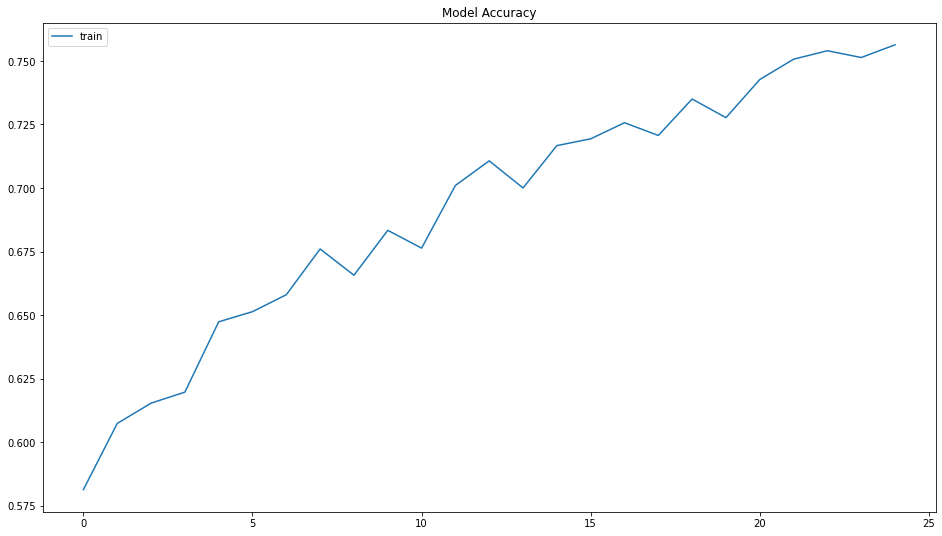

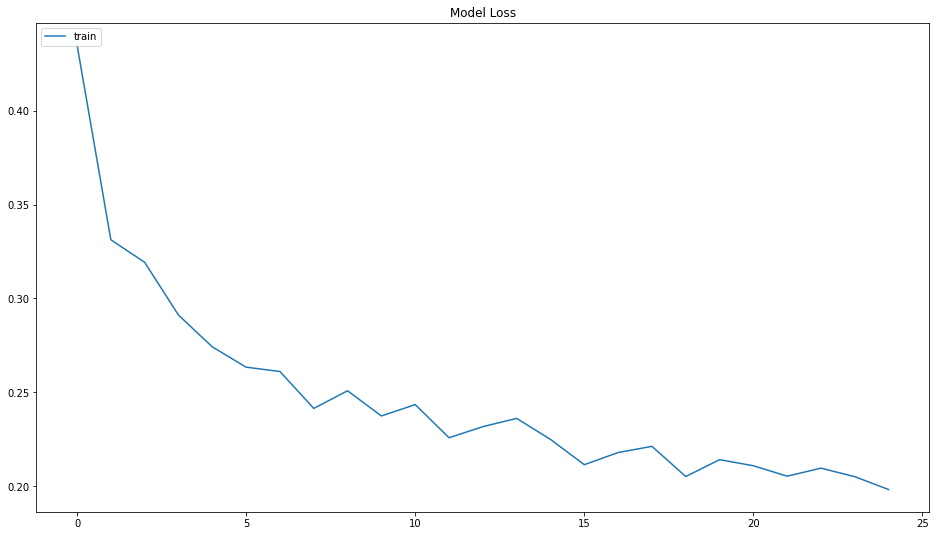

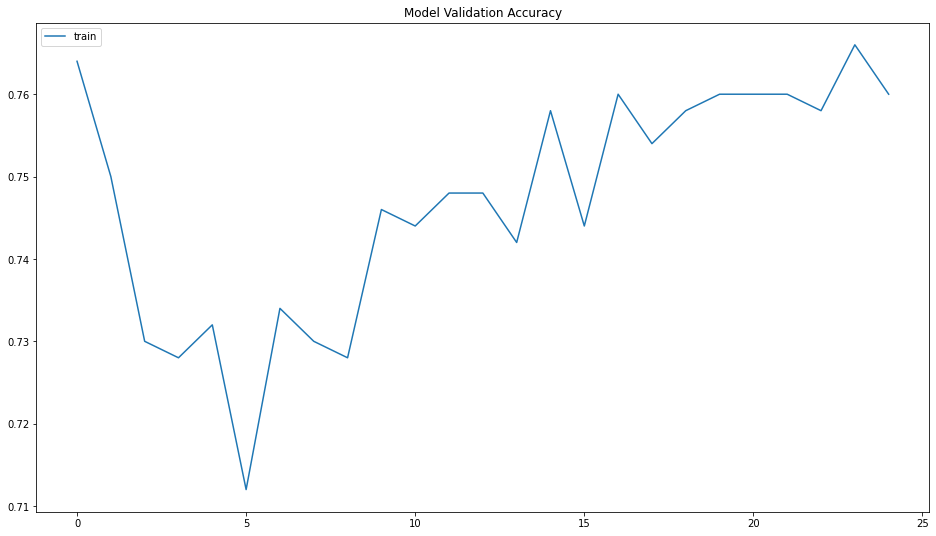

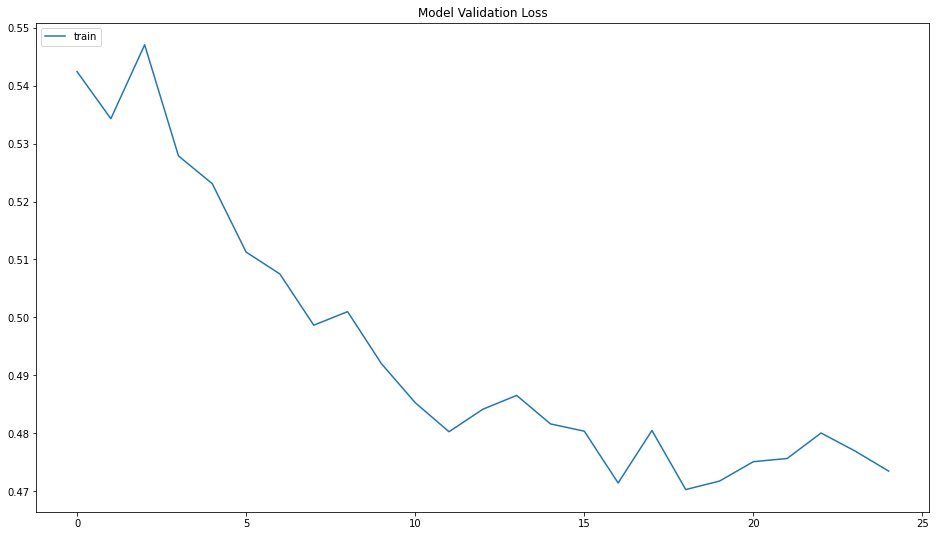

In [9]:
plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['accuracy'])
plt.title('Model Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['loss'])
plt.title('Model Loss')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Validation Loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
pred = vgg_model.predict(X_test)
pred = np.argmax(pred, axis=1) 
y_true = np.argmax(y_test, axis=1)

#pip install mlxtend



In [ ]:
pip install mlxtend

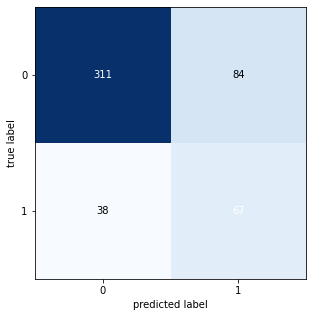

In [11]:

CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [12]:
from mlxtend.plotting import plot_confusion_matrix

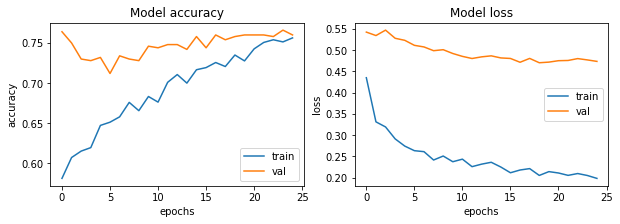

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
     





In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
preds = vgg_model.predict(X_test)
acc = accuracy_score(y_test, np.round(preds))*100
#cm = confusion_matrix(y_test, np.round(preds))

In [ ]:
acc

79.61538461538461

In [17]:
tn, fp, fn, tp = CM.ravel()
preds = vgg_model.predict(X_test)
acc = accuracy_score(y_test, np.round(preds)*100)
#preds = vgg_model.predict(X_test)


In [18]:
tn, fp, fn, tp = CM.ravel()
preds = vgg_model.predict(X_test)

#preds = vgg_model.predict(X_test)

In [20]:
acc = accuracy_score(y_val, np.round(preds))*100

In [ ]:
X_val = X_val/255

In [21]:
from sklearn.metrics import accuracy_score
print('CONFUSION MATRIX ------------------')
print(CM)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
f1 = 2*precision*recall/(precision+recall)
print('Accuracy:',acc)
print('Precision:',precision)
print('Recall: {}%',recall)
print('F1-score: {}',f1)

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[311  84]
 [ 38  67]]

TEST METRICS ----------------------
Accuracy: 57.199999999999996
Precision: 44.370860927152314
Recall: {}% 63.8095238095238
F1-score: {} 52.34375

TRAIN METRIC ----------------------
Train acc: 75.63
